In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# importanto somente o modelo train test 

# moulos de machine learn
from sklearn.model_selection import train_test_split
# moulos de machine learn
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()
# verificar o tamanho do dataset
df.shape

(614, 13)

In [4]:
df.describe()
# verificar o tipo das colunas
df.dtypes

Loan_ID               object
Gender               float64
Married               object
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

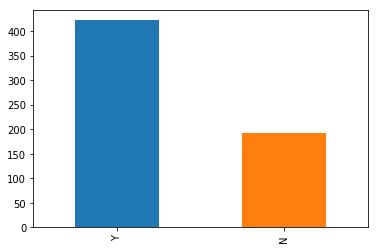

In [5]:
df['Loan_Status'].value_counts().plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000279F9A429B0>,
      dtype=object)

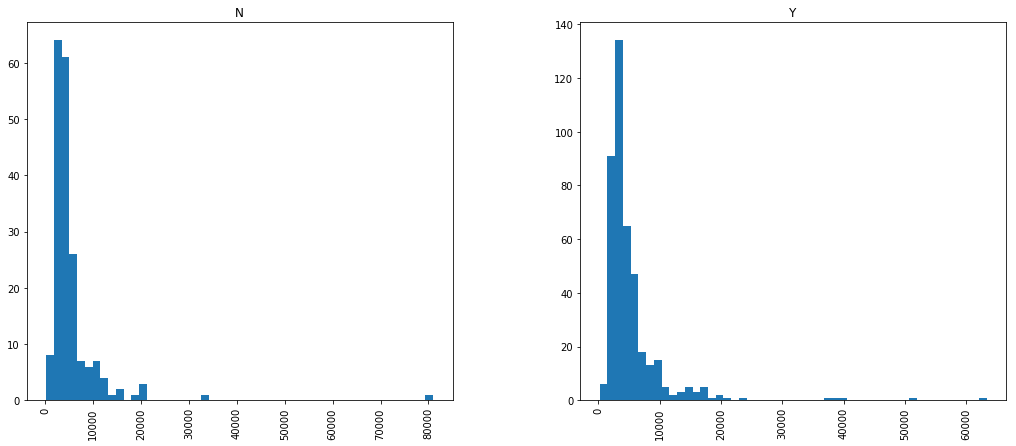

In [6]:
df[['Loan_Status','ApplicantIncome']].hist(by='Loan_Status',bins=50, figsize=(17,7))

In [7]:
df.columns =['Loan_ID','is_Male','is_Married','Dependents','is_Graduated','is_Self_Employed','ApplicantIncome',
             'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status'
            ]

In [8]:
df.head()


,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# verifica os valores  e realiza o mapeamento
yes_no_map = {'Yes':1,'No':0}
df['is_Married'] = df['is_Married'].map(yes_no_map)


In [10]:
df['is_Married'].unique()

array([ 0.,  1., nan])

In [11]:
df['totalIncome']  = df['ApplicantIncome'] + df['CoapplicantIncome']

In [12]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalIncome
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [13]:
mapper_status = {'Y':1,'N':0}
df['Loan_Status'] = df['Loan_Status'].map(mapper_status)


In [14]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalIncome
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [15]:
# one hot encoding 
df = pd.get_dummies(df,columns=['Property_Area'])

In [16]:
# deletar feature
df.drop('Loan_ID',axis=1, inplace=True)

In [17]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,totalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,5849.0,0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,6091.0,1,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,3000.0,0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,4941.0,0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,6000.0,0,0,1


In [18]:
df.isnull().sum().sort_values(ascending = False)

Credit_History             50
LoanAmount                 22
is_Married                  3
Property_Area_Urban         0
Property_Area_Semiurban     0
Property_Area_Rural         0
totalIncome                 0
Loan_Status                 0
Loan_Amount_Term            0
CoapplicantIncome           0
ApplicantIncome             0
is_Self_Employed            0
is_Graduated                0
Dependents                  0
is_Male                     0
dtype: int64

In [19]:
df = df.loc[df['is_Married'].notnull()]

In [20]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace = True)

In [21]:
df['Credit_History'].value_counts()
df['Credit_History'].fillna(1,inplace=True)

In [22]:
df.corr()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,totalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
is_Male,1.000000,0.367926,0.172422,-0.044560,-0.001284,0.061997,0.082028,0.108135,-0.082177,0.010004,0.019381,0.095791,0.079452,-0.105347,0.031761
is_Married,0.367926,1.000000,0.337748,-0.014223,0.005904,0.051332,0.077770,0.146981,-0.102624,0.009481,0.089280,0.083776,-0.004520,0.003744,0.000514
Dependents,0.172422,0.337748,1.000000,-0.053947,0.055471,0.118901,0.028788,0.163692,-0.103619,-0.038736,0.012593,0.125490,-0.003147,0.004086,-0.001169
is_Graduated,-0.044560,-0.014223,-0.053947,1.000000,0.011414,0.140590,0.063585,0.166864,0.073701,0.072670,0.084286,0.161765,-0.075984,0.038022,0.034363
is_Self_Employed,-0.001284,0.005904,0.055471,0.011414,1.000000,0.127550,-0.017019,0.115500,-0.033421,-0.000757,-0.002404,0.112919,0.020858,0.009885,-0.030407
ApplicantIncome,0.061997,0.051332,0.118901,0.140590,0.127550,1.000000,-0.116266,0.566037,-0.044361,-0.018900,-0.005154,0.893069,0.016269,-0.016002,0.000756
CoapplicantIncome,0.082028,0.077770,0.028788,0.063585,-0.017019,-0.116266,1.000000,0.188151,-0.059135,0.012093,-0.057733,0.343035,0.003860,-0.025199,0.022269
LoanAmount,0.108135,0.146981,0.163692,0.166864,0.115500,0.566037,0.188151,1.000000,0.036135,-0.001631,-0.036782,0.620553,0.043538,-0.008376,-0.033530
Loan_Amount_Term,-0.082177,-0.102624,-0.103619,0.073701,-0.033421,-0.044361,-0.059135,0.036135,1.000000,-0.005291,-0.023619,-0.068741,0.035425,0.058878,-0.095081
Credit_History,0.010004,0.009481,-0.038736,0.072670,-0.000757,-0.018900,0.012093,-0.001631,-0.005291,1.000000,0.540021,-0.012396,-0.019637,0.034905,-0.017002


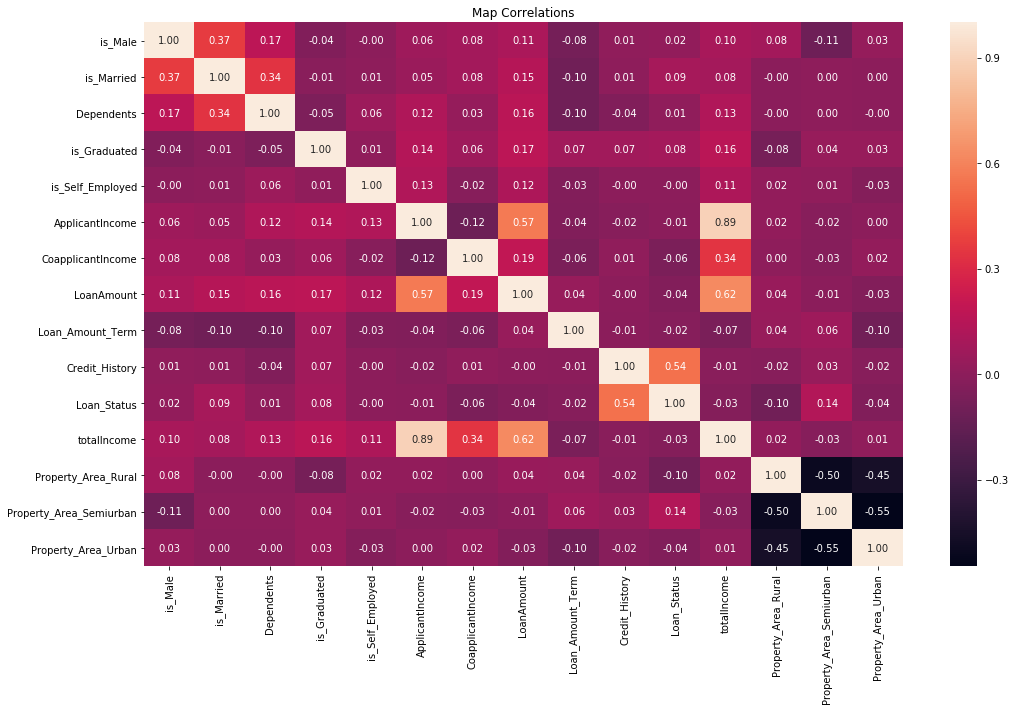

In [23]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True, fmt='.2f')
plt.title("Map Correlations")
plt.show()

In [24]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])


In [25]:
df['totalIncome'] = np.log(df['totalIncome'])

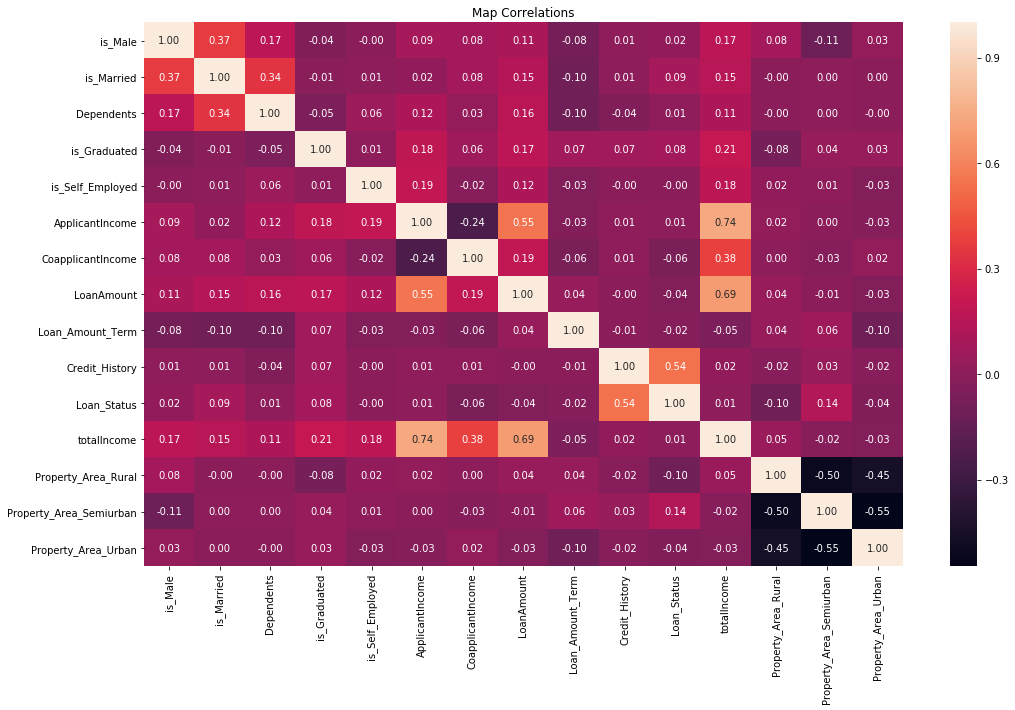

In [26]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True, fmt='.2f')
plt.title("Map Correlations")
plt.show()

In [27]:
X = df.drop('Loan_Status', axis=1) # carateristica do modelo para o treinamento
y = df['Loan_Status']  # columa para previsão 

In [28]:
#passa o modelo e classe pra prever e qt para prever %  pra o treino
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.33, random_state=42)


In [29]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Score do Conjunto de treino:{0:.2%}'.format(lr.score(X_train,y_train)))
print('Score do Conjunto de Teste:{0:.2%}'.format(lr.score(X_test,y_test)))

Score do Conjunto de treino:80.44%
Score do Conjunto de Teste:82.18%


In [30]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)
print('Score do Conjunto de treino:{0:.2%}'.format(dt.score(X_train,y_train)))
print('Score do Conjunto de Teste:{0:.2%}'.format(dt.score(X_test,y_test)))

Score do Conjunto de treino:82.64%
Score do Conjunto de Teste:83.17%


In [31]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf.fit(X_train,y_train)
print('Score do Conjunto de treino:{0:.2%}'.format(rf.score(X_train,y_train)))
print('Score do Conjunto de Teste:{0:.2%}'.format(rf.score(X_test,y_test)))

Score do Conjunto de treino:82.15%
Score do Conjunto de Teste:81.19%


In [32]:
new_df = X_test


In [33]:
new_df['Loan_Status'] =  dt.predict(new_df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
new_df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,totalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
81,1.0,1.0,1.0,1,1.0,7.781139,0.0,146.369492,360.0,1.0,7.781139,0,1,0,1
219,0.0,1.0,2.0,1,0.0,8.362409,2383.0,127.000000,360.0,1.0,8.804775,0,1,0,1
55,1.0,1.0,2.0,1,0.0,7.903966,1167.0,97.000000,360.0,1.0,8.262301,0,1,0,1
602,1.0,1.0,3.0,1,0.0,8.648748,0.0,128.000000,360.0,1.0,8.648748,0,0,1,1
266,1.0,1.0,2.0,1,0.0,8.457018,1387.0,150.000000,360.0,1.0,8.715224,0,1,0,1


In [38]:
 new_df.to_csv('dados_previsto.csv',index=False)

In [39]:
dt.feature_importances_

array([0.01066162, 0.        , 0.        , 0.        , 0.        ,
       0.00863591, 0.04342761, 0.02627059, 0.0231181 , 0.72242608,
       0.10631969, 0.        , 0.0591404 , 0.        ])

In [41]:
import pickle
pickle.dump(dt,open('modelo train.sav','wb'))